## Roulette Simulation and Profit Analysis

Roulette is a popular casino game played with a wheel that has numbered slots colored red, black, or green. In American roulette, the wheel has 38 slots: 18 red slots, 18 black slots, and 2 green slots labeled "0" and "00."

Players can place various types of bets, including betting on whether the outcome will be a red or black slot. In this exercise, we focus on a simple bet: betting on black.

<div style="text-align: center;">
    <img src="additional_files\image.png" alt="Roulette Wheel" style="width: 30%;">
</div>

If you place a bet on black and the outcome is indeed black, you win and double your money. However, if the outcome is red or green, you lose the amount you bet. For example, if you bet 1 dollar on black and win, you gain 1 dollar. If you lose, you forfeit your 1-dollar bet.

Since there are three colors, the probability of landing on black is not exactly $\frac{1}{2}$, but rather: $\frac{18}{38} = \frac{9}{19}$

### 1.function that simulates this game for 𝑁 rounds

In [137]:
import random

def roulette_simulation(N):
    total_earned = 0
    for _ in range(N):
        number = random.randint(1, 38)
        if number <= 18:
            total_earned += 1
        else:
            total_earned -= 1
            
    return total_earned


In [138]:
N = 1000
earnings = roulette_simulation(N)
print(earnings)

-40


### 2. Monte Carlo simulation

Results for N = 10:
  Sample Mean:                     -0.535
  Sample SE:                        0.00997
--------------------------------------------------
Results for N = 25:
  Sample Mean:                     -1.306
  Sample SE:                        0.01574
--------------------------------------------------
Results for N = 100:
  Sample Mean:                     -5.252
  Sample SE:                        0.03172
--------------------------------------------------
Results for N = 1000:
  Sample Mean:                     -52.772
  Sample SE:                        0.09970
--------------------------------------------------


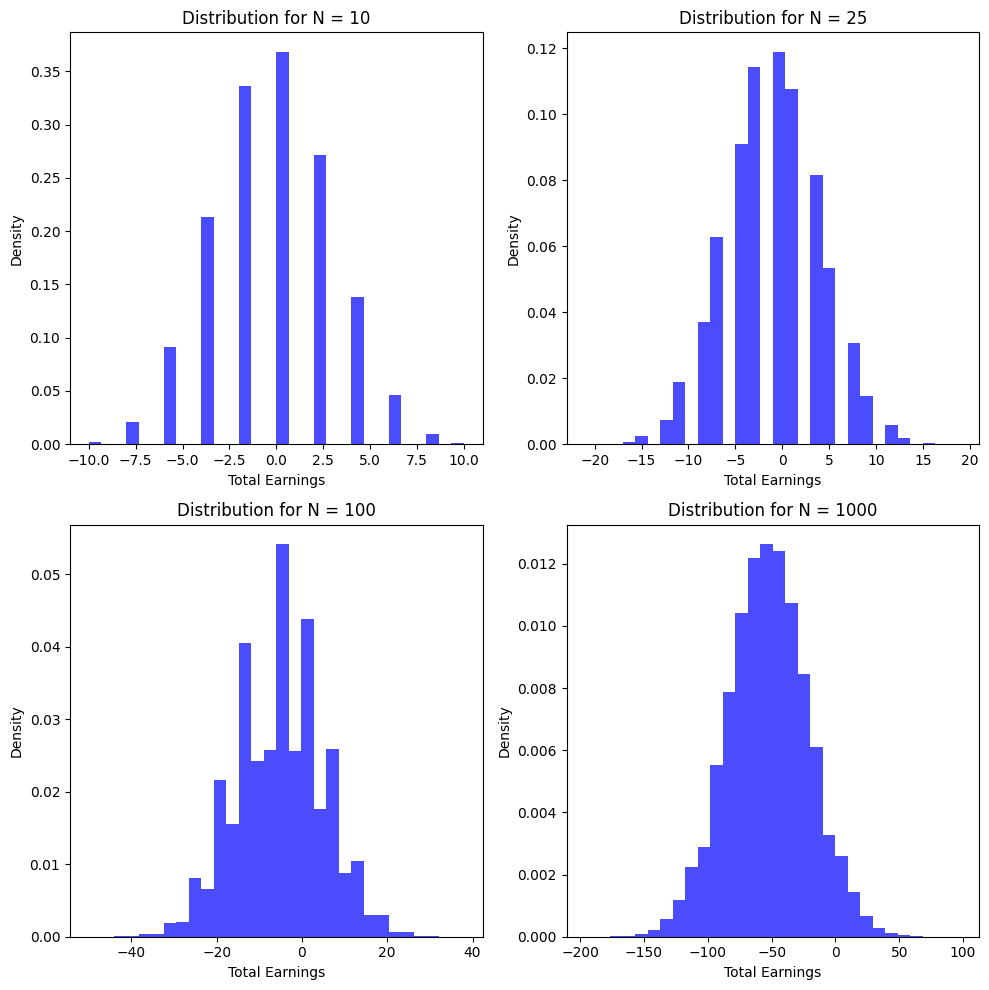

In [139]:
import numpy as np
import matplotlib.pyplot as plt

num_simulations = 100000
N_values = [10, 25, 100, 1000]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i in range(len(N_values)):
    results = [roulette_simulation(N_values[i]) for _ in range(num_simulations)]
    results = np.array(results)

    ax = axes[i]
    ax.hist(results, bins=30, density=True, alpha=0.7, color='blue')
    ax.set_title(f"Distribution for N = {N_values[i]}")
    ax.set_xlabel("Total Earnings")
    ax.set_ylabel("Density")
    
    sample_mean = np.mean(results)
    sample_std = np.std(results, ddof=1)
    sample_se = sample_std / np.sqrt(num_simulations)
    
    print(f"Results for N = {N_values[i]}:")
    print(f"  Sample Mean:                     {sample_mean:.3f}")
    print(f"  Sample SE:                        {sample_se:.5f}")
    print("-" * 50)
    
plt.tight_layout()
plt.show()

### 3.previous simulation but for the average winnings

Results for N = 10:
  Sample Mean:                     -0.052
  Sample SE:                        0.00100
--------------------------------------------------
Results for N = 25:
  Sample Mean:                     -0.051
  Sample SE:                        0.00063
--------------------------------------------------
Results for N = 100:
  Sample Mean:                     -0.052
  Sample SE:                        0.00032
--------------------------------------------------
Results for N = 1000:
  Sample Mean:                     -0.053
  Sample SE:                        0.00010
--------------------------------------------------


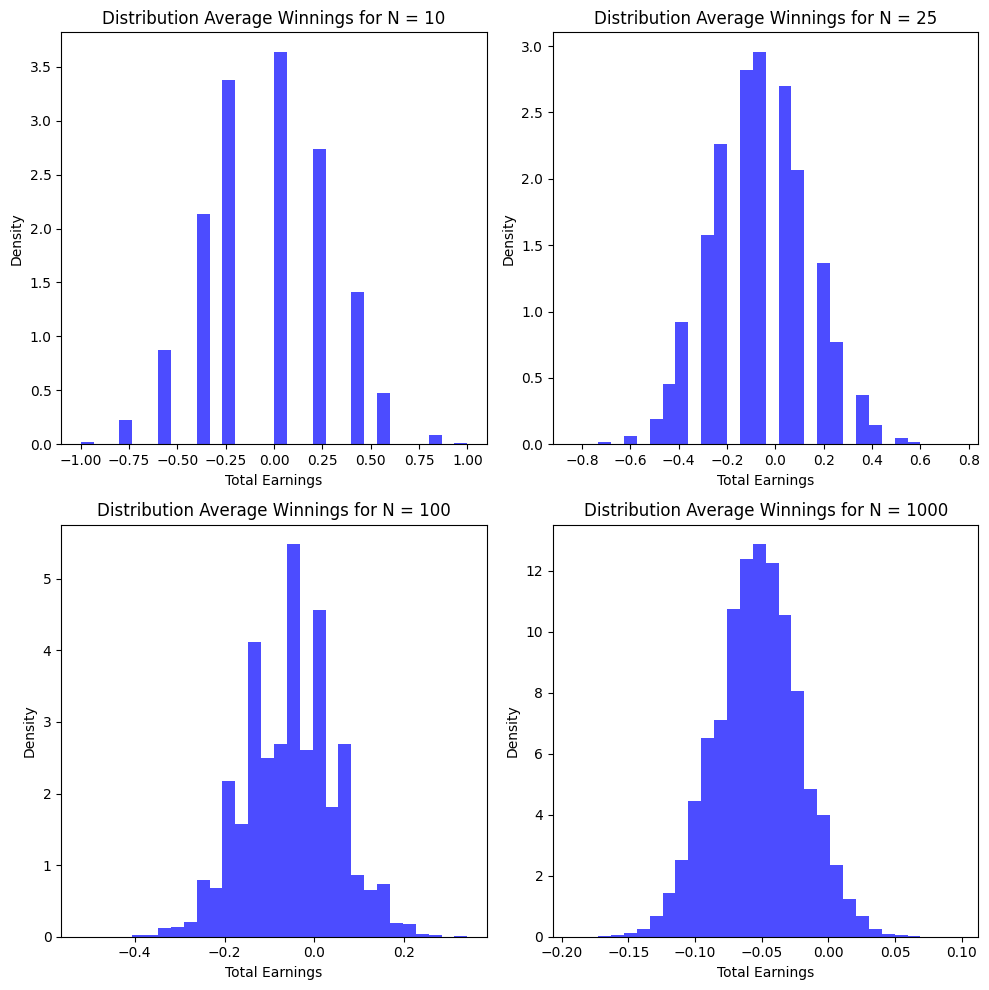

In [140]:
import numpy as np
import matplotlib.pyplot as plt

num_simulations = 100000
N_values = [10, 25, 100, 1000]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i in range(len(N_values)):
    
    results = [roulette_simulation(N_values[i])/N_values[i] for _ in range(num_simulations)]
    results = np.array(results)

    ax = axes[i]
    ax.hist(results, bins=30, density=True, alpha=0.7, color='blue')
    ax.set_title(f"Distribution Average Winnings for N = {N_values[i]}")
    ax.set_xlabel("Total Earnings")
    ax.set_ylabel("Density")
    
    sample_mean = np.mean(results)
    sample_std = np.std(results, ddof=1)
    sample_se = sample_std / np.sqrt(num_simulations)
    
    print(f"Results for N = {N_values[i]}:")
    print(f"  Sample Mean:                     {sample_mean:.3f}")
    print(f"  Sample SE:                        {sample_se:.5f}")
    print("-" * 50)
    
plt.tight_layout()
plt.show()

### 4.compare theoretical values with Monte Carlo simulation results

In [141]:
num_simulations = 100000
N_values = [10, 25, 100, 1000]

Expected_value_single = -1 / 19  # E(X) = (18/38)*1 + (20/38)*(-1)
Variance_single = 360 / 361  # Var(X) = 1 - (-1/19)^2

for i in range(len(N_values)):
    results = [roulette_simulation(N_values[i]) for _ in range(num_simulations)]
    results = np.array(results)

    sample_mean = np.mean(results)
    sample_std = np.std(results, ddof=1)
    sample_se = sample_std / np.sqrt(num_simulations)
    
    theoretical_mean = N_values[i] * Expected_value_single
    theoretical_std = np.sqrt(N_values[i] * Variance_single)
    theoretical_se = theoretical_std / np.sqrt(num_simulations)
    
    print(f"Results for N = {N_values[i]}:")
    print(f"  Sample Mean:                     {sample_mean:.3f}")
    print(f"  Theoretical Mean:                {theoretical_mean:.3f}")
    print(f"  Sample SE:                        {sample_se:.5f}")
    print(f"  Theoretical SE:                   {theoretical_se:.5f}")
    print("-" * 50)

Results for N = 10:
  Sample Mean:                     -0.521
  Theoretical Mean:                -0.526
  Sample SE:                        0.00999
  Theoretical SE:                   0.00999
--------------------------------------------------
Results for N = 25:
  Sample Mean:                     -1.319
  Theoretical Mean:                -1.316
  Sample SE:                        0.01578
  Theoretical SE:                   0.01579
--------------------------------------------------
Results for N = 100:
  Sample Mean:                     -5.247
  Theoretical Mean:                -5.263
  Sample SE:                        0.03160
  Theoretical SE:                   0.03158
--------------------------------------------------
Results for N = 1000:
  Sample Mean:                     -52.456
  Theoretical Mean:                -52.632
  Sample SE:                        0.10001
  Theoretical SE:                   0.09986
--------------------------------------------------


### 5. CLT Approximation vs Monte Carlo Estimate

For $N = 25$:

- *Mean of $S_N$*:  
  $$
    \mu = E[S_N] = N \times E[X_i] = 25 \times \left(-\frac{1}{19}\right) = -\frac{25}{19}
  $$

- *Standard Deviation of $S_N$*:  
  $$
    \sigma = \sqrt{N \times \mathrm{Var}(X_i)} = \sqrt{25 \times \frac{360}{361}} = 5 \sqrt{\frac{360}{361}}
  $$

We want the probability that **the casino loses money**, which means:

$$
P(\text{casino loses}) = P(S_N > 0).
$$

By the Central Limit Theorem, for moderate $N$, $S_N$ is approximately normal with mean $\mu$ and standard deviation $\sigma$.

$$
P(S_N > 0) 
= P\left(\frac{S_N - \mu}{\sigma} > \frac{0 - \mu}{\sigma}\right) 
= 1 - \Phi\!\Bigl(\frac{0 - \mu}{\sigma}\Bigr)
$$

where $\Phi$ is the standard normal CDF.

In [142]:
import math
import numpy as np
from scipy.stats import norm

mu = N * Expected_value_single
sigma = math.sqrt(N * Variance_single)

z_value = (0 - mu) / sigma
clt_probability = 1 - norm.cdf(z_value)

print(f"CLT Approximation: {clt_probability:.5f}")

def monte_carlo_estimate(N, num_simulations):
    count_casino_loses = 0
    for _ in range(num_simulations):
        s = roulette_simulation(N)
        if s > 0:
            count_casino_loses += 1
    return count_casino_loses / num_simulations

mc_probability = monte_carlo_estimate(N, num_simulations)
print(f"Monte Carlo Estimate: {mc_probability:.5f}")


CLT Approximation: 0.04779
Monte Carlo Estimate: 0.04458


### 6.Plot the probability that the casino loses money

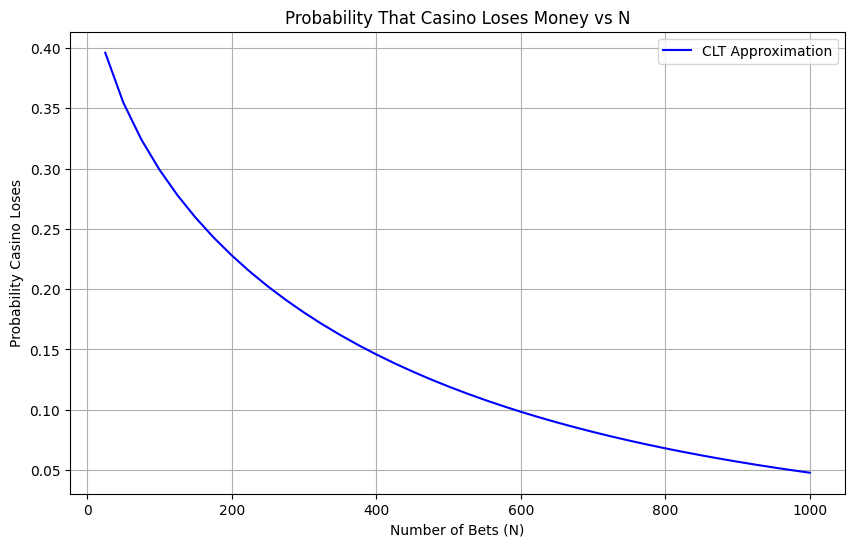

In [143]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

N_values = np.arange(25, 1001, 25)  # Values of N from 25 to 1000 in steps of 25

clt_probabilities = []
mc_probabilities = []

for N in N_values:
    mu = N * Expected_value_single
    sigma = math.sqrt(N * Variance_single)
    z_value = (0 - mu) / sigma
    clt_prob = 1 - norm.cdf(z_value)
    clt_probabilities.append(clt_prob)
    
    # mc_prob = monte_carlo_estimate(N, num_simulations)
    # mc_probabilities.append(mc_prob)

plt.figure(figsize=(10, 6))
plt.plot(N_values, clt_probabilities, label="CLT Approximation", color='blue')
# plt.plot(N_values, mc_probabilities, label="Monte Carlo Estimate", color='red')
plt.xlabel("Number of Bets (N)")
plt.ylabel("Probability Casino Loses")
plt.title("Probability That Casino Loses Money vs N")
plt.legend()
plt.grid()
plt.show()

## Predicting the Outcome of the 2016 USA Presidential Election

## Drug Safety Test

### 1. load csv file

In [144]:
import pandas as pd

df = pd.read_csv('drug_safety.csv')
df.head()
display(df)

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0
...,...,...,...,...,...,...,...,...
16098,78,male,Placebo,16,NaN,NaN,Yes,1
16099,78,male,Placebo,2,7.5,4.9,No,0
16100,78,male,Placebo,20,NaN,NaN,Yes,1
16101,78,male,Placebo,4,6.4,4.8,No,0


### 2. Drop samples containing NaN

In [145]:
df_cleaned = df.dropna()

### 3. Basic Statistics
Here are basic statistics for numeric columns. mean, std, min, max, Q1, Q2, Q3

In [146]:
numeric_cols = ['age', 'week','wbc', 'rbc', 'num_effects']
summary_stats = df[numeric_cols].describe()
display(summary_stats.round(2))

,age,week,wbc,rbc,num_effects
count,16103.00,16103.00,9128.00,9127.00,16103.00
mean,64.12,7.74,7.34,4.67,0.10
std,8.78,6.94,2.00,0.46,0.32
min,39.00,0.00,1.80,2.10,0.00
25%,58.00,1.00,6.00,4.40,0.00
50%,65.00,4.00,7.10,4.70,0.00
75%,71.00,12.00,8.40,5.00,0.00
max,84.00,20.00,26.50,7.60,3.00


### 4. Drug Vs. Placebo

In [147]:
grouped = df.groupby('trx')

trx_stats = grouped[['wbc', 'rbc', 'num_effects']].agg(['mean', 'std', 'count'])
display(trx_stats.round(2))

wbc               rbc             num_effects             
         mean   std count  mean   std count        mean   std  count
trx                                                                 
Drug     7.33  2.01  6011  4.68  0.45  6011         0.1  0.33  10727
Placebo  7.36  1.97  3117  4.66  0.47  3116         0.1  0.32   5376

### 5. Numeralize adverse_effects column

In [148]:
df['adverse_effects'] = df['adverse_effects'].astype(str)
df['adverse_effects'] = df['adverse_effects'].map({'Yes': 1, 'No': 0})
display(df)
print('mean of numeralized adverse_effects:', df['adverse_effects'].mean())

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,0,0
1,62,male,Drug,1,NaN,NaN,0,0
2,62,male,Drug,12,5.6,5.0,0,0
3,62,male,Drug,16,NaN,NaN,0,0
4,62,male,Drug,2,6.6,5.1,0,0
...,...,...,...,...,...,...,...,...
16098,78,male,Placebo,16,NaN,NaN,1,1
16099,78,male,Placebo,2,7.5,4.9,0,0
16100,78,male,Placebo,20,NaN,NaN,1,1
16101,78,male,Placebo,4,6.4,4.8,0,0


mean of numeralized adverse_effects: 0.09538595292802583


#### 6. Hypothesis Testing

in scipy.ttest_ind, <b>alternative</b> argument accepts one of these three values: {‘two-sided’, ‘less’, ‘greater’}
- two-sided: means of distributions are unequal
- less: mean of distribution of the first sample is less than the second one
- greater: mean of distribution of first sample is greater than the second one

equal_var accepts a boolean value. If it's true, assumes that two samples have same variance and if it's false, assumes that variances are different. 

In [149]:
trx_stats = grouped[['wbc', 'rbc', 'num_effects', 'adverse_effects']].agg(['mean', 'std', 'count'])
display(trx_stats.round(4))

wbc                   rbc               num_effects          \
           mean     std count    mean     std count        mean     std   
trx                                                                       
Drug     7.3305  2.0089  6011  4.6791  0.4550  6011      0.1023  0.3261   
Placebo  7.3600  1.9729  3117  4.6605  0.4651  3116      0.1003  0.3172   

               adverse_effects                 
         count            mean     std  count  
trx                                            
Drug     10727          0.0955  0.2939  10727  
Placebo   5376          0.0952  0.2936   5376

#### a. mean white blood cell count

In [150]:
from scipy import stats

drug_wbc = df[(df['trx'] == 'Drug') & (df['wbc'].notna())]
placebo_wbc = df[(df['trx'] == 'Placebo') & (df['wbc'].notna())]

t_stat, p_value = stats.ttest_ind(
    drug_wbc['wbc'], 
    placebo_wbc['wbc'], 
    equal_var=False,
    alternative='less'
)

print(f"WBC p-value: {p_value:.4f}")


WBC p-value: 0.2499


#### b. mean red blood cell count

In [151]:
drug_rbc = df[(df['trx'] == 'Drug') & (df['rbc'].notna())]
placebo_rbc = df[(df['trx'] == 'Placebo') & (df['rbc'].notna())]

t_stat, p_value = stats.ttest_ind(
    drug_rbc['rbc'], 
    placebo_rbc['rbc'], 
    equal_var=False,
    alternative='greater'
)

print(f"RBC p-value: {p_value:.4f}")

RBC p-value: 0.0341


#### c. mean num effects

In [152]:
drug_num_effects = df[(df['trx'] == 'Drug') & (df['num_effects'].notna())]
placebo_num_effects = df[(df['trx'] == 'Placebo') & (df['num_effects'].notna())]

t_stat, p_value = stats.ttest_ind(
    drug_num_effects['num_effects'], 
    placebo_num_effects['num_effects'], 
    equal_var=False,
    alternative='greater'
)

print(f"num_effects p-value: {p_value:.4f}")

num_effects p-value: 0.3540


#### d. mean adverse effect

In [153]:
drug_adverse_effects = df[(df['trx'] == 'Drug') & (df['adverse_effects'].notna())]
placebo_adverse_effects = df[(df['trx'] == 'Placebo') & (df['adverse_effects'].notna())]

t_stat, p_value = stats.ttest_ind(
    drug_adverse_effects['adverse_effects'], 
    placebo_adverse_effects['adverse_effects'], 
    equal_var=False,
    alternative='greater'
)

print(f"adverse_effects p-value: {p_value:.4f}")

adverse_effects p-value: 0.4820


## Questions